In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How to calculate summary statistics

## Aggregating statistics

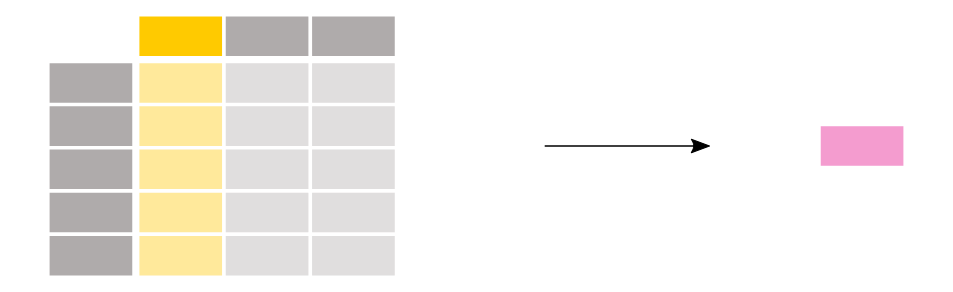

### What is the average age of the Titanic passengers?

In [4]:
titanic["Age"].mean()

np.float64(29.69911764705882)

#### Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

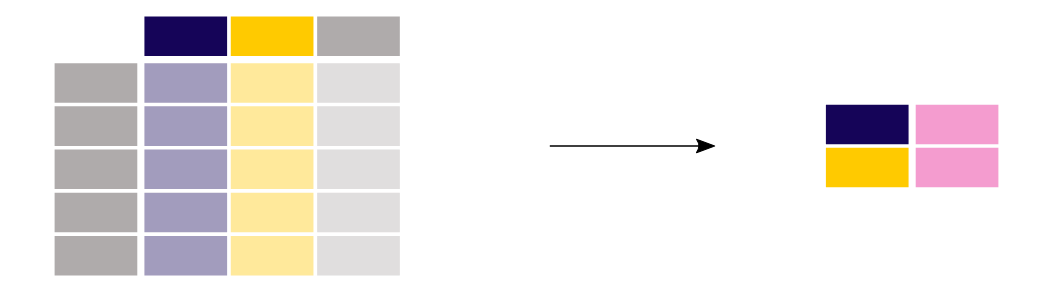

#### What is the median age and ticket fare price of the Titanic passengers?



In [5]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

##### The statistic applied to multiple columns of a `DataFrame` (the selection of two columns returns a `DataFrame`.

#### The aggregating statistic can be calculated for multiple columns at the same time.

In [8]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method

In [9]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


## Aggregating statistics grouped by category

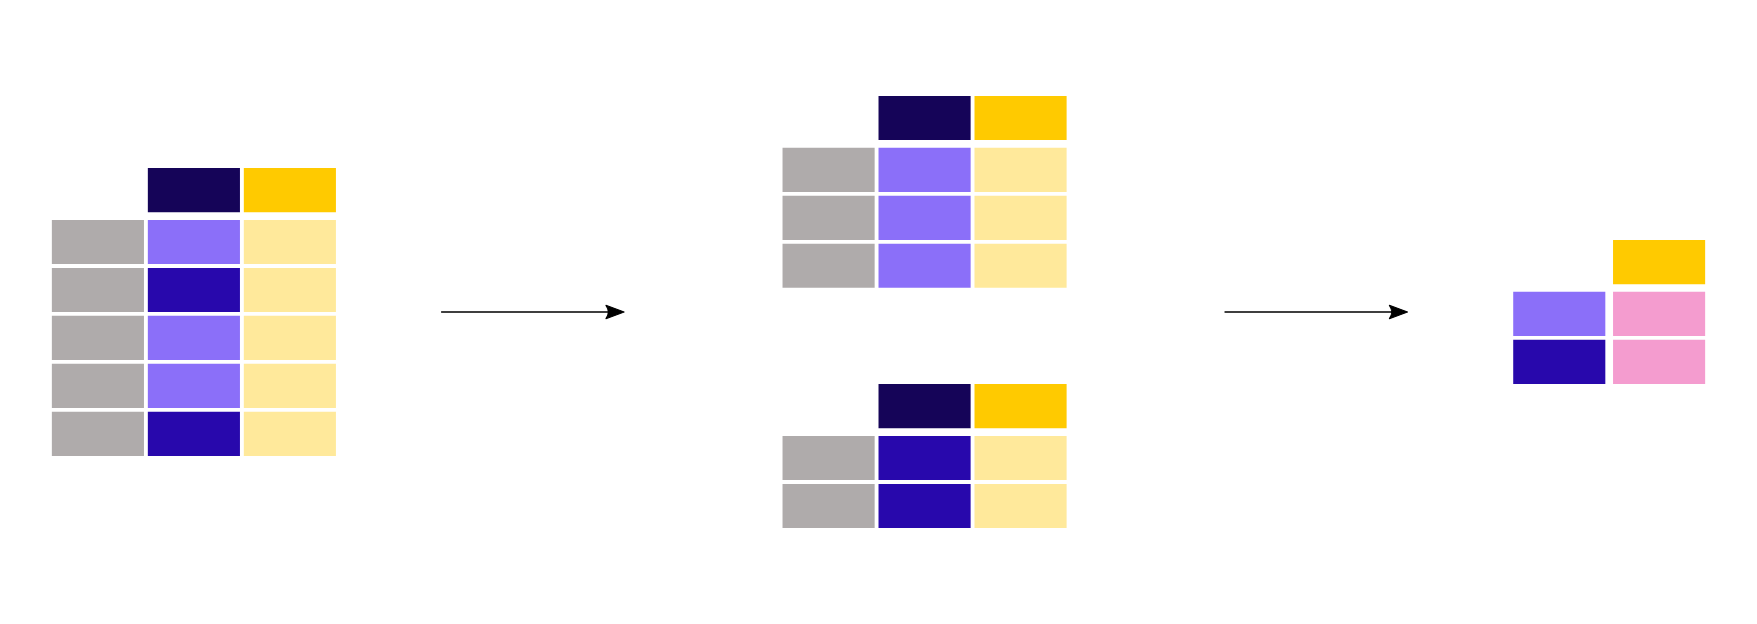

### What is the average age for male versus female Titanic passengers?

In [11]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


##### As our interest is the average age for each gender, a subselection on these two columns is made first: `titanic[["Sex", "Age"]]`. Next, the `groupby()` method is applied on the `Sex` column to make a group per category. The average age for each gender is calculated and returned.

Calculating a given statistic (e.g. `mean` age) for each category in a column (e.g. male/female in the `Sex` column) is a common pattern. The groupby method is used to support this type of operations. This fits in the more general split-apply-combine pattern:
* Split the data into groups
* Apply a function to each group independently
* Combine the results into a data structure

The apply and combine steps are typically done together in pandas.

In the previous example, 2 columns were explicitly selected first. If not, the `mean` method is applied to each column containing numerical columns by passing `numeric_only=True`.